### Tercer ejemplo: fuerza de gravedad entre 2 cuerpos. 

Aunque para hacer todo el análisis de tiro parabólico usamos el hecho de que hay una fuerza de gravedad, en realidad lo que se hace es una aproximación, donde se supone que "el campo gravitatorio es constante en todas partes". Esta aproximación funciona a escala humana, pero no cumple cuando se trata de estudiar los astros lejanos, como la luna, los planetas o las estrellas. En ese caso se debe considerar que la atracción gravitatoria no es constante, sino que depende de la distancia entre los cuerpos. 

La ley que describe esto, es la famosa ley de la gravitación universal de Newton también. Y dice algo así: 

$ F(m_1,m_2,r) = G \frac{m_1 m_2 r}{|r|^3} $

aquí $m_1$ y $m_2$ son las masas de los cuerpos en cuestión, $r$ es el vector que va del centro de masas del cuerpo 1, al centro de masas del cuerpo 2, y $G$ es la constante de la gravitación universal. 

Bien, ahora podemos calcular la fuerza de 2 cuerpos, debido a sus masas:

In [1]:
function F_gravitacional(m1,m2,x1,x2) 
    G = 6.67408e-11 
    r = x2 - x1
    F = G*m1*m2*r/(norm(r)).^3
end

Mt = 5.972e24
Rt = 6.371e6
F_gravitacional(50,Mt,[0,0,0],[-Rt,0,0])

3-element Array{Float64,1}:
 -490.982
    0.0  
    0.0  

In [2]:
Mα = 2.167e30
Mc = 67
Rα = 4.257e16
F_gravitacional(Mα,Mc,[Rα,0,0], [0,0,0])

3-element Array{Float64,1}:
 -5.34709e-12
  0.0        
  0.0        

In [3]:
ML=7.349e22
b = Mt/(Mt-ML)
dTL = 384400000
dT = -b + sqrt(b^2 +(b*dTL^2))
386787.2212734285

386787.2212734285

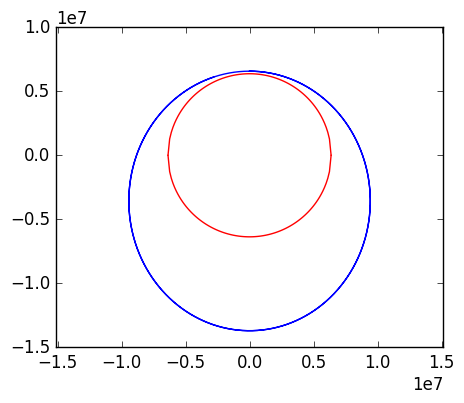

6


(-1.0e7,1.0e7,-1.5e7,1.0e7)

In [32]:
using PyPlot
include("Metodos2.jl")
f1(x,t) = F_gravitacional(1,Mt,[x[4],x[5],x[6]],[0,0,0])[1]
f2(x,t) = F_gravitacional(1,Mt,[x[4],x[5],x[6]],[0,0,0])[2]
f3(x,t) = F_gravitacional(1,Mt,[x[4],x[5],x[6]],[0,0,0])[3]
f4(x,t) = x[1]
f5(x,t) = x[2]
f6(x,t) = x[3]
fig = figure(figsize=(5,4))
circulo1(X) = -sqrt(Rt^2-X.^2)
circulo2(X) = sqrt(Rt^2-X.^2)
vx0=0
vy0=9000 
vz0=1000
i=4 
j=5
α=[vx0,vy0,vz0,Rt+200000.,0.,0.]
N=100000
a=0
b=20000
T,X = RK4v(a,b,N,α,f1,f2,f3,f4,f5,f6)

#axis([-3*1.6Rt,3*1.6Rt,-3Rt,3Rt])

plot(X[:,j],X[:,i])
Xt = linspace(-Rt,Rt,100)
plot(Xt,circulo1(Xt), color = "red")
plot(Xt,circulo2(Xt), color = "red")        
axis("equal")
